<a href="https://colab.research.google.com/github/kungfumas/mesin-belajar/blob/master/KNN_on_Iris_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN (using scikit-learn) on Iris dataset.
### Building a model to classify the species of Iris flower based on the sepal length, speal width, petal length and petal width


In [33]:
# Data in a csv format, each observation has a 4 measurements/features 
# and the species type.
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

## Load the Iris data set and check the features

In [34]:
#Import the load_iris function from datsets module
from sklearn.datasets import load_iris

In [35]:
#Create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [36]:
type(iris)

sklearn.utils.Bunch

In [37]:
#Print the iris data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
#Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
#Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [40]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [41]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [43]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

In [44]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Train the Model 

In [45]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [46]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [47]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [48]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [49]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

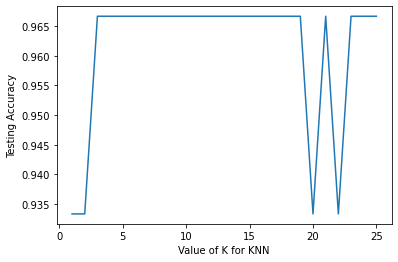

In [50]:

%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### K values with 3 to 19 has the same accuracy which is 96.66, so we can use any one value from that, i choose K as 5 and train the model with full training data

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [52]:

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


versicolor
setosa


In [53]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



Text(91.68, 0.5, 'predicted label')

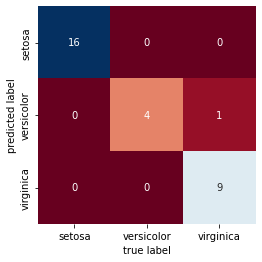

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [55]:
import pickle
filename = 'knn_iris.pkl'
pickle.dump(knn, open(filename, 'wb')) 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(knn)
 
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
y_predict=knn_from_pickle.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


In [56]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(knn, 'knn_iris2.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('knn_iris2.pkl')
 
# Use the loaded model to make predictions
y_predict=knn_from_joblib.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
